# Results Analysis
Generate plots to visualize the results of the estimation

## Imports dependencies

In [1]:
from create_df import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
sns.set_style('darkgrid')

## Read and Process Data
Read and process the data from the csv files structured from the estimation

### Read & Process single estimation

In [1]:
p_entropy, p_information, p_order, p_distri, unigram, hrate = process_single_analysis(
    "/Users/admin/Jupyter_notebooks/Noisy_Entropy_Estimation/Final/"
)

NameError: name 'process_single_analysis' is not defined

### Read & Process multiple estimations
main_dir
- label1
    - unigram
    - hrate
    - ppm
- label2
    - ...
- ...

In [33]:
main_dir = "/Users/admin/Jupyter_notebooks/Noisy_Entropy_Estimation/Final/tweet-covid/2021_by_fr"
label_type = 'date' # 'file', 'date', 'emotion', 'topic', 'sentiment'
p_entropy, p_information, p_order, p_distri, unigram, hrate = process_multiple_analysis(
    main_dir=main_dir,
    label_type=label_type
)

## Visualize Results

### Unigram / Hrate Entropy

hrate mean: 6.786561349210778
hrate std: 0.34890224274255394
unigram mean: 9.909373150954522
unigram std: 0.2718964263683726


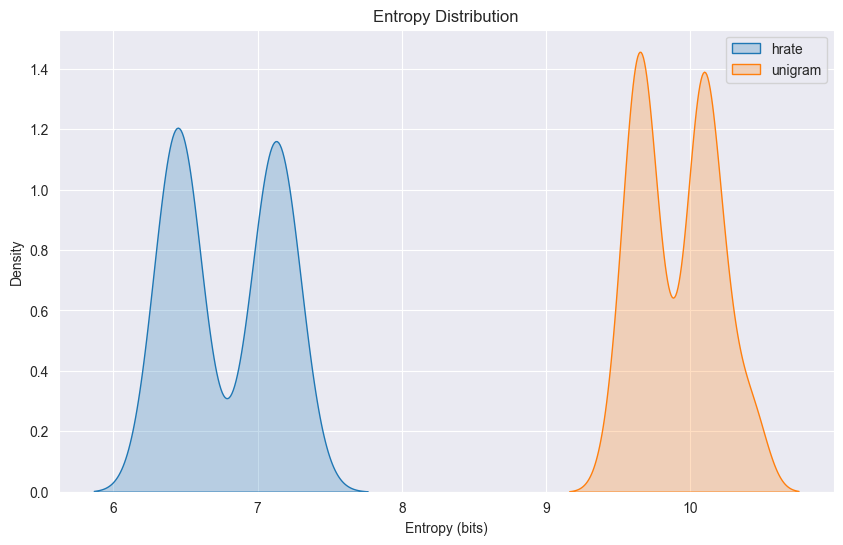

In [5]:
plt.figure(figsize=(10, 6))

# Generate KDE plot for hrate and unigram
sns.kdeplot(hrate['entropy.Entropy'], label='hrate', fill=True)
sns.kdeplot(unigram['entropy'], label='unigram', fill=True)

plt.title('Entropy Distribution')
plt.ylabel('Density')
plt.xlabel('Entropy (bits)')
plt.legend()

print(f'hrate mean: {hrate["entropy.Entropy"].mean()}')
print(f'hrate std: {hrate["entropy.Entropy"].std()}')
print(f'unigram mean: {unigram["entropy"].mean()}')
print(f'unigram std: {unigram["entropy"].std()}')

plt.show()

### Unigram Entropy

(4.0, 11.0)

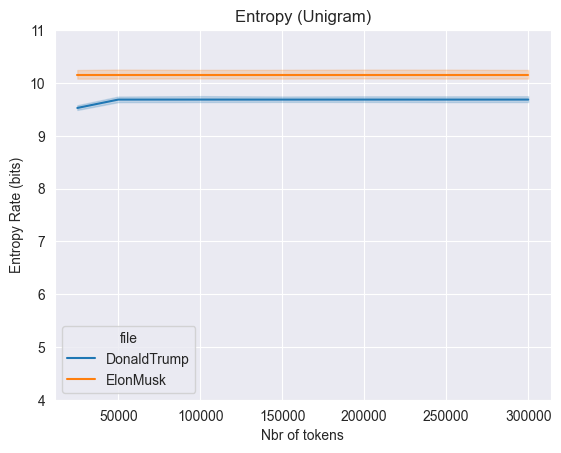

In [6]:
sns.lineplot(data=unigram, x='token_count', y='entropy', hue=label_type)
plt.title('Entropy (Unigram)')
plt.ylabel('Entropy Rate (bits)')
plt.xlabel('Nbr of tokens')
plt.ylim(4, 11)

In [94]:
res = unigram[unigram['token_count']==300000].groupby([label_type])
print('Unigram Entropy')
for name, group in res:
    mean = group['entropy'].mean()
    name = str(name)[2:-3]
    print(f'{name}: {mean:.3f}')

Unigram Entropy
arts_&_culture: 10.522
business_&_entrepreneurs: 7.784
celebrity_&_pop_culture: 10.695
diaries_&_daily_life: 10.248
family: 9.669
fashion_&_style: 10.755
film_tv_&_video: 10.348
fitness_&_health: 10.485
food_&_dining: 10.419
gaming: 10.373
learning_&_educational: 10.464
music: 10.104
news_&_social_concern: 10.564
other_hobbies: 9.063
relationships: 9.547
science_&_technology: 9.895
sports: 10.522
travel_&_adventure: 10.133
und: 10.537
youth_&_student_life: 8.742


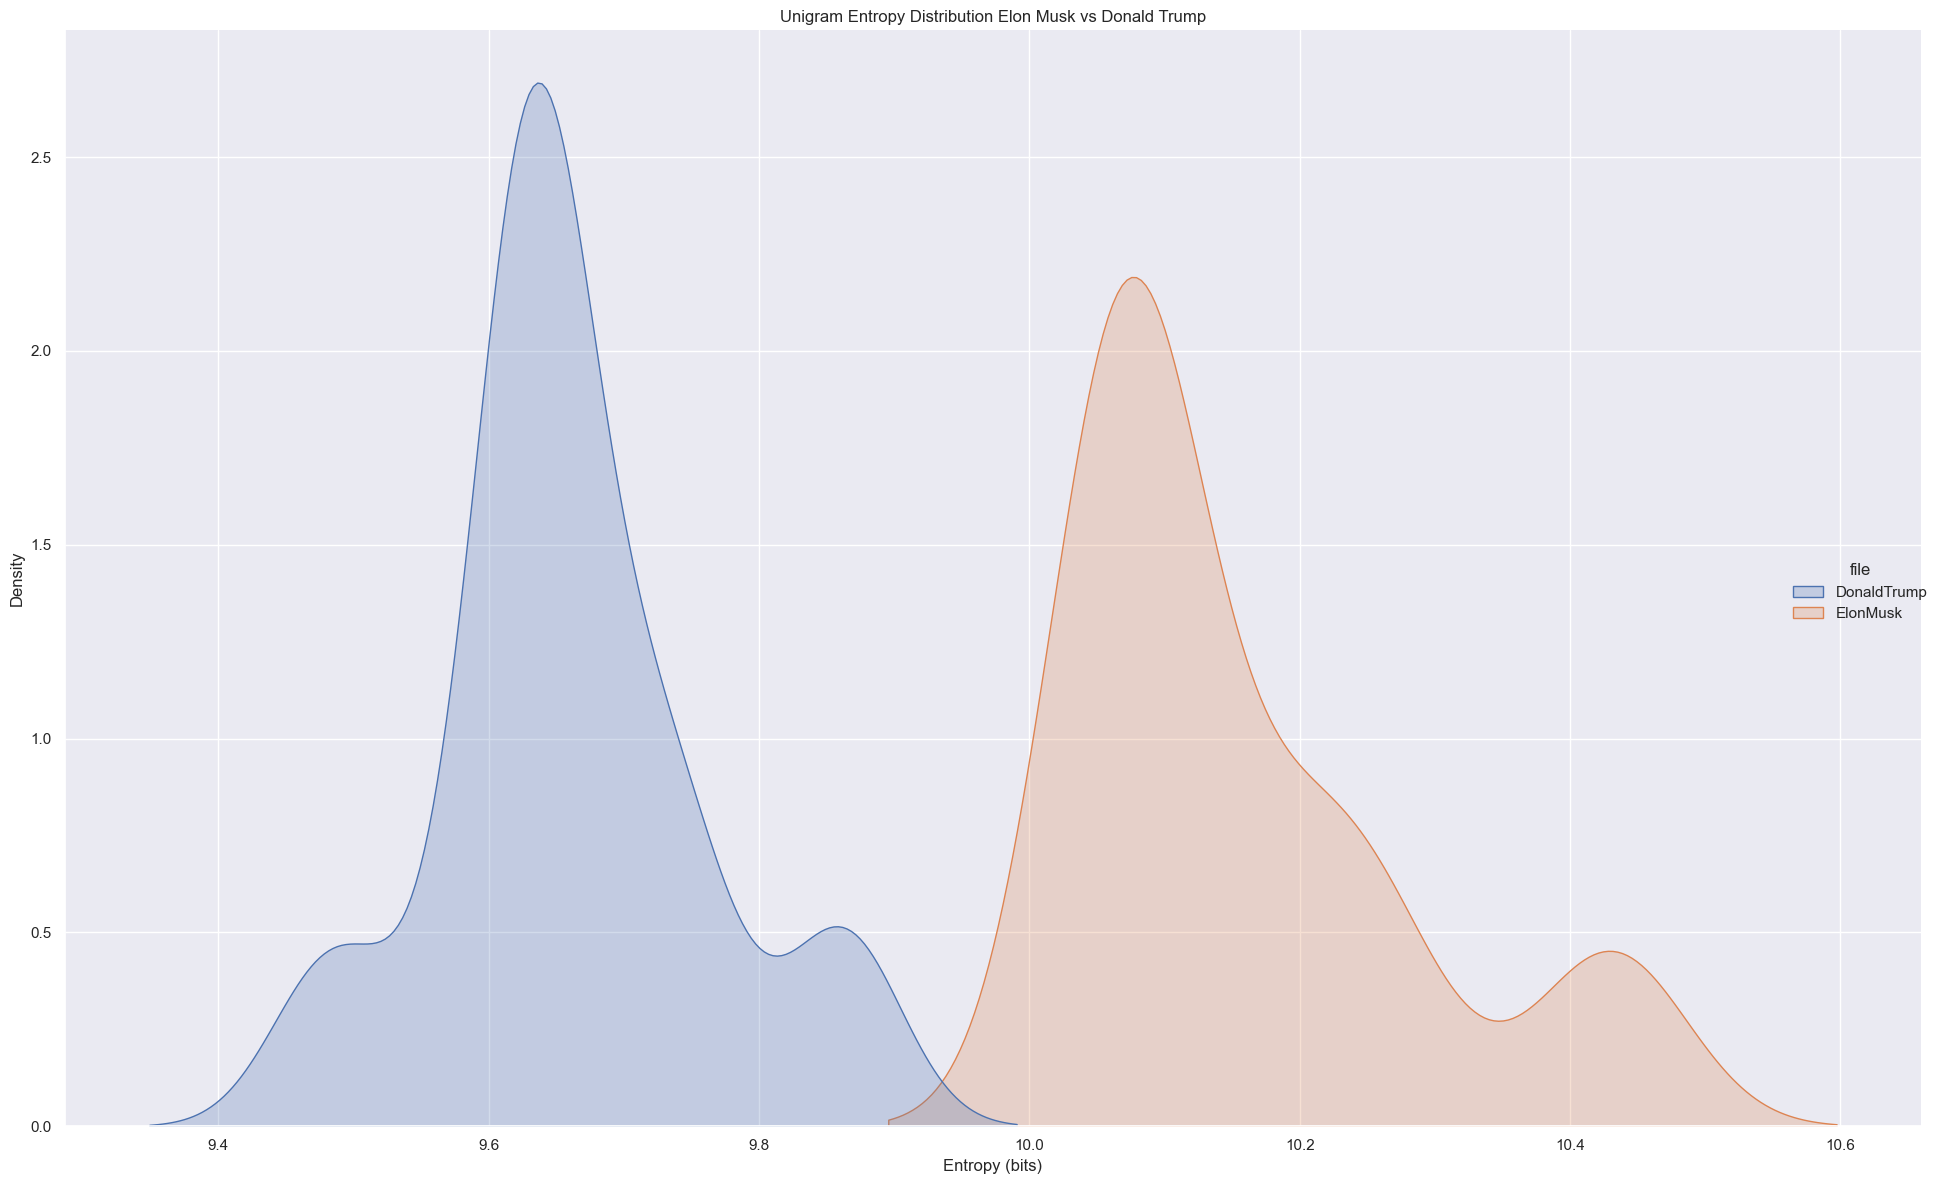

In [31]:
ax = sns.displot(unigram, x='entropy', hue=label_type, kind='kde', fill=True, height=12, aspect=1.5)
plt.title('Unigram Entropy Distribution Elon Musk vs Donald Trump')
plt.xlabel('Entropy (bits)')
plt.tight_layout()
# plt.yscale('log')
plt.show()

#### Unigram Time Series

In [217]:
def visualize_unigram_time_series(unigram_data):
    unigram_data['date'] = pd.to_datetime(unigram_data['date'])
    unigram_data['date_ordinal'] = unigram_data['date'].apply(lambda date: date.toordinal())

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(unigram_data['date_ordinal'], unigram_data['entropy'])
    print(f"The trend in number (slope) is: {slope}")

    plt.figure(figsize=(12, 8))
    sns.lineplot(data=unigram_data, x='date', y='entropy')
    plt.plot(unigram_data['date'], intercept + slope * unigram_data['date_ordinal'], color='red', label='Trendline')
    
    plt.title('Entropy Over Time EN')
    plt.ylabel('Entropy (bits)')
    plt.ylim(9, 11)
    plt.legend()
    plt.show()

visualize_unigram_time_series(unigram)


KeyError: 'date'

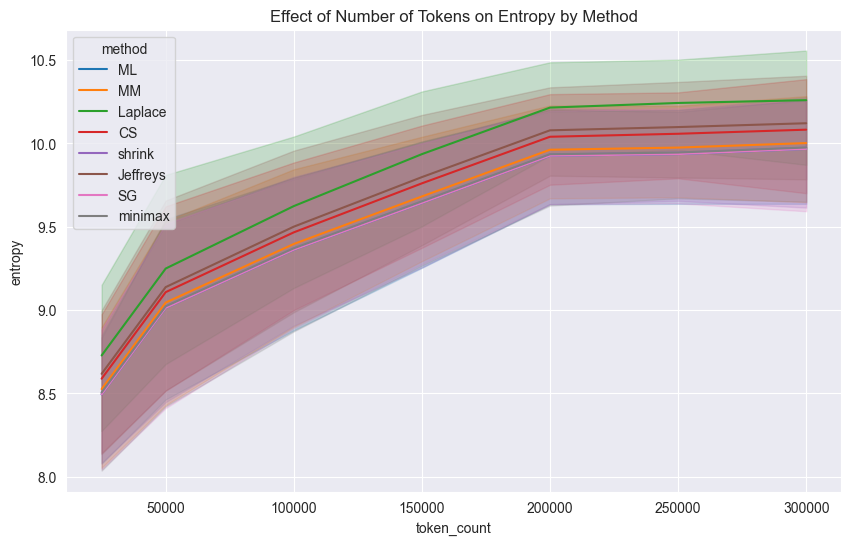

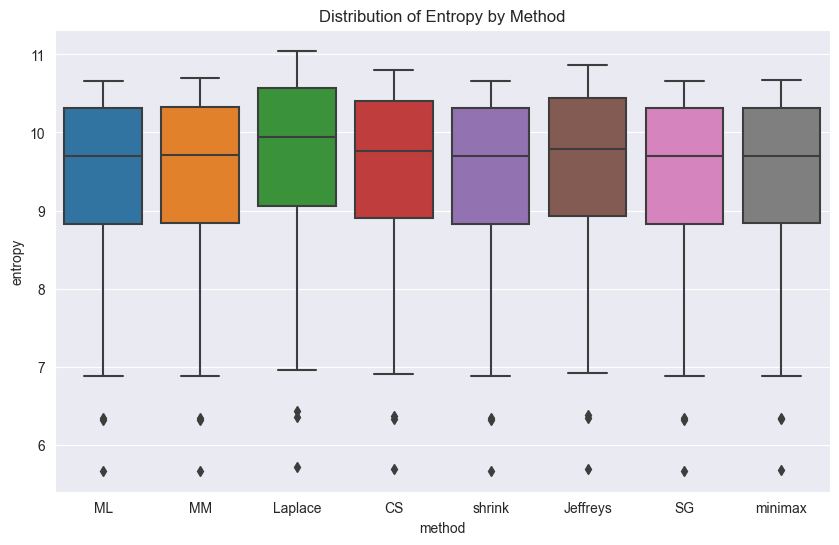

mean: method
CS          9.579357
Jeffreys    9.614732
Laplace     9.743299
ML          9.470850
MM          9.506029
SG          9.470902
minimax     9.480296
shrink      9.478832
Name: entropy, dtype: float64
std: method
CS          1.024827
Jeffreys    1.039658
Laplace     1.068066
ML          1.015522
MM          1.012061
SG          1.015486
minimax     1.013774
shrink      1.010192
Name: entropy, dtype: float64


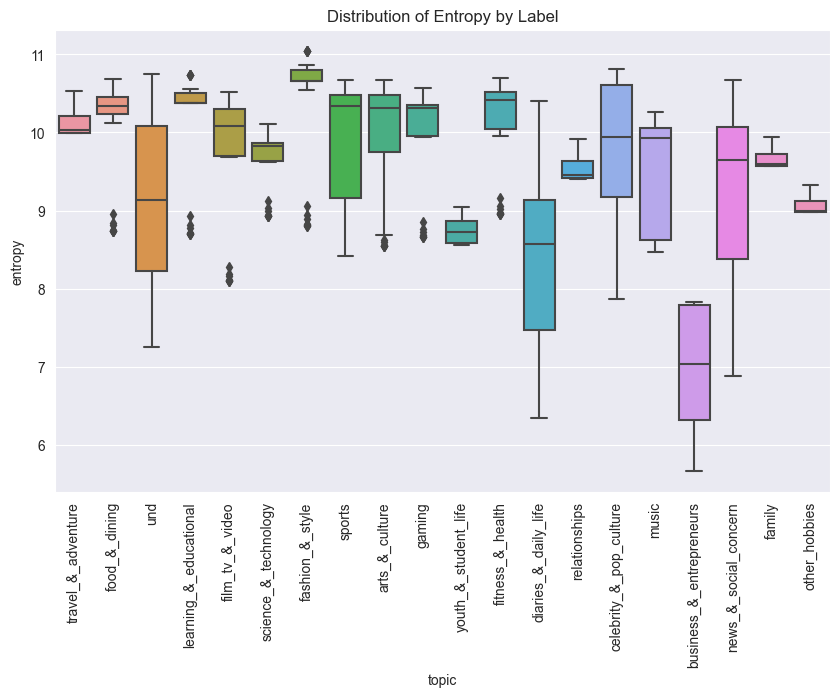

mean: topic
arts_&_culture               9.993657
business_&_entrepreneurs     6.925621
celebrity_&_pop_culture      9.702475
diaries_&_daily_life         8.413404
family                       9.668606
fashion_&_style             10.465804
film_tv_&_video              9.778266
fitness_&_health            10.204000
food_&_dining               10.151886
gaming                      10.031212
learning_&_educational      10.179370
music                        9.529556
news_&_social_concern        9.146215
other_hobbies                9.062719
relationships                9.547106
science_&_technology         9.703159
sports                       9.883132
travel_&_adventure          10.133459
und                          9.064918
youth_&_student_life         8.742357
Name: entropy, dtype: float64
std: topic
arts_&_culture              0.704030
business_&_entrepreneurs    0.839045
celebrity_&_pop_culture     0.975831
diaries_&_daily_life        1.157134
family                      0.125311
fa

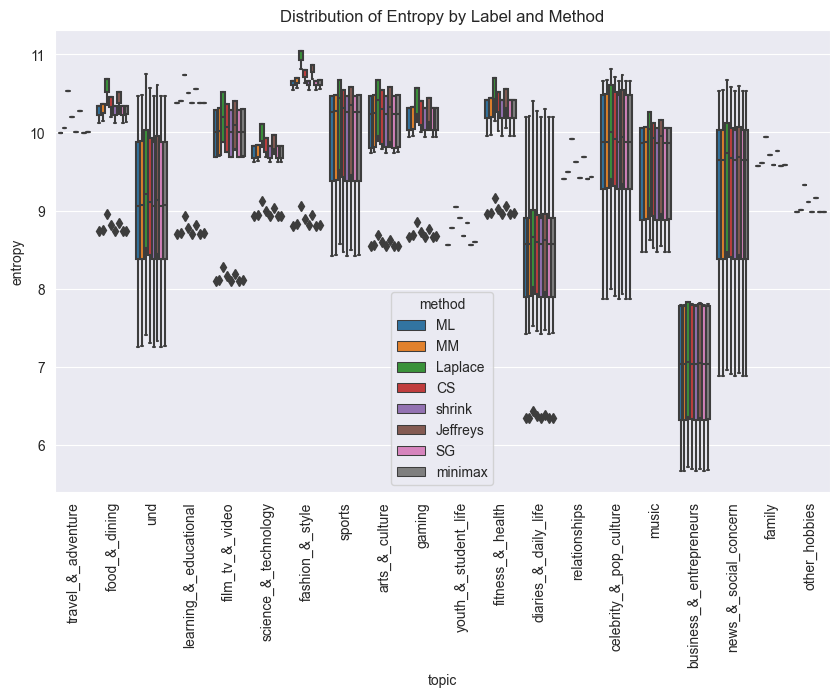

In [98]:
def visualize_unigrams(unigram_data):
    # The effect of the number of tokens on the entropy
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=unigram_data, x='token_count', y='entropy', hue='method')
    plt.title('Effect of Number of Tokens on Entropy by Method')
    plt.show()

    # The effect of the method on the entropy
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=unigram_data, x='method', y='entropy')
    plt.title('Distribution of Entropy by Method')
    plt.show()
    print(f'mean: {unigram_data.groupby("method")["entropy"].mean()}')
    print(f'std: {unigram_data.groupby("method")["entropy"].std()}')

    # The effect of the labels on the entropy
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=unigram_data, x=label_type, y='entropy')
    plt.xticks(rotation=90)
    plt.title('Distribution of Entropy by Label')
    plt.show()
    print(f'mean: {unigram_data.groupby(label_type)["entropy"].mean()}')
    print(f'std: {unigram_data.groupby(label_type)["entropy"].std()}')

    # The effect of the labels on the entropy
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=unigram_data, x=label_type, y='entropy', hue='method')
    plt.xticks(rotation=90)
    plt.title('Distribution of Entropy by Label and Method')
    plt.show()


# Call the function with your unigram data
visualize_unigrams(unigram)

### Hrate Entropy

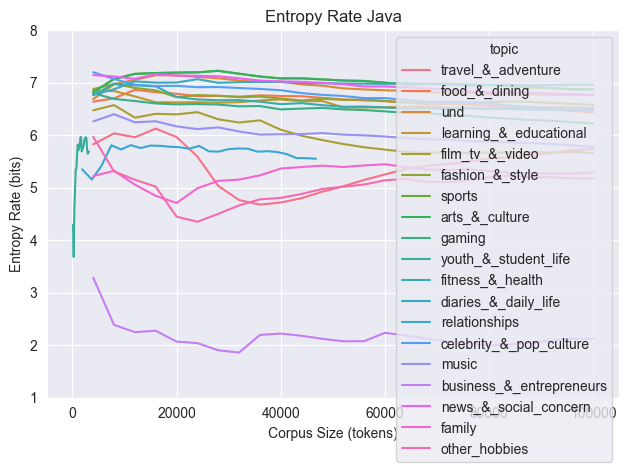

In [102]:
plt.Figure(figsize=(12, 8))
sns.lineplot(data=hrate, x='entropy.Corpus.Size', y='entropy.Entropy', hue=label_type)
plt.title('Entropy Rate Java')
plt.ylabel('Entropy Rate (bits)')
plt.xlabel('Corpus Size (tokens)')
plt.ylim(1, 8)
plt.tight_layout()

In [100]:
res = hrate.groupby([label_type])
print('Hrate Entropy')
for name, group in res:
    # mean over the 80000 to 100000 tokens
    mean = group[(group['entropy.Corpus.Size']>=80000) & (group['entropy.Corpus.Size']<=100000)]['entropy.Entropy'].mean()
    name = str(name)[2:-3]
    print(f'{name}: {mean}')

Hrate Entropy
arts_&_culture: 6.90613386600685
business_&_entrepreneurs: 2.0622206811870263
celebrity_&_pop_culture: 6.526356160641257
diaries_&_daily_life: 6.956107299886724
family: 5.283827951248323
fashion_&_style: 6.6154792848875905
film_tv_&_video: 5.670181792184842
fitness_&_health: 6.49227172735253
food_&_dining: 6.4979765122018485
gaming: 6.279665181157821
learning_&_educational: 6.519069151440878
music: 5.833284517673515
news_&_social_concern: 6.79606289721956
other_hobbies: 5.1948597758219615
relationships: nan
sports: 6.90613386600685
travel_&_adventure: 5.641077258511408
und: 6.775744028532164
youth_&_student_life: nan


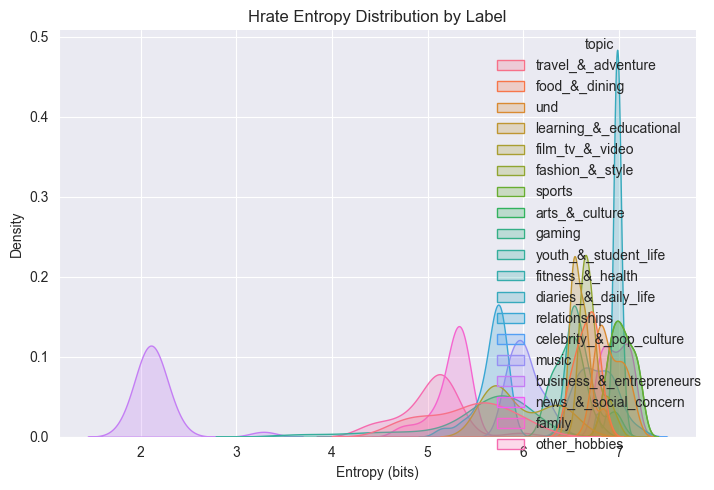

In [103]:
plt.Figure(figsize=(10, 6))
sns.displot(hrate, x='entropy.Entropy', hue=label_type, kind='kde', fill=True)
plt.title('Hrate Entropy Distribution by Label')
plt.xlabel('Entropy (bits)')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Corpus Size (tokens)')

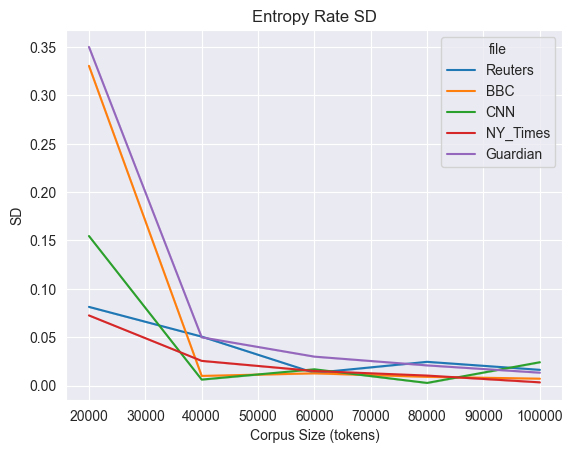

In [183]:
sns.lineplot(data=hrate, x='sd.Corpus.Size', y='sd.SD', hue=label_type)
plt.title('Entropy Rate SD')
plt.ylabel('SD')
plt.xlabel('Corpus Size (tokens)')
# plt.ylim


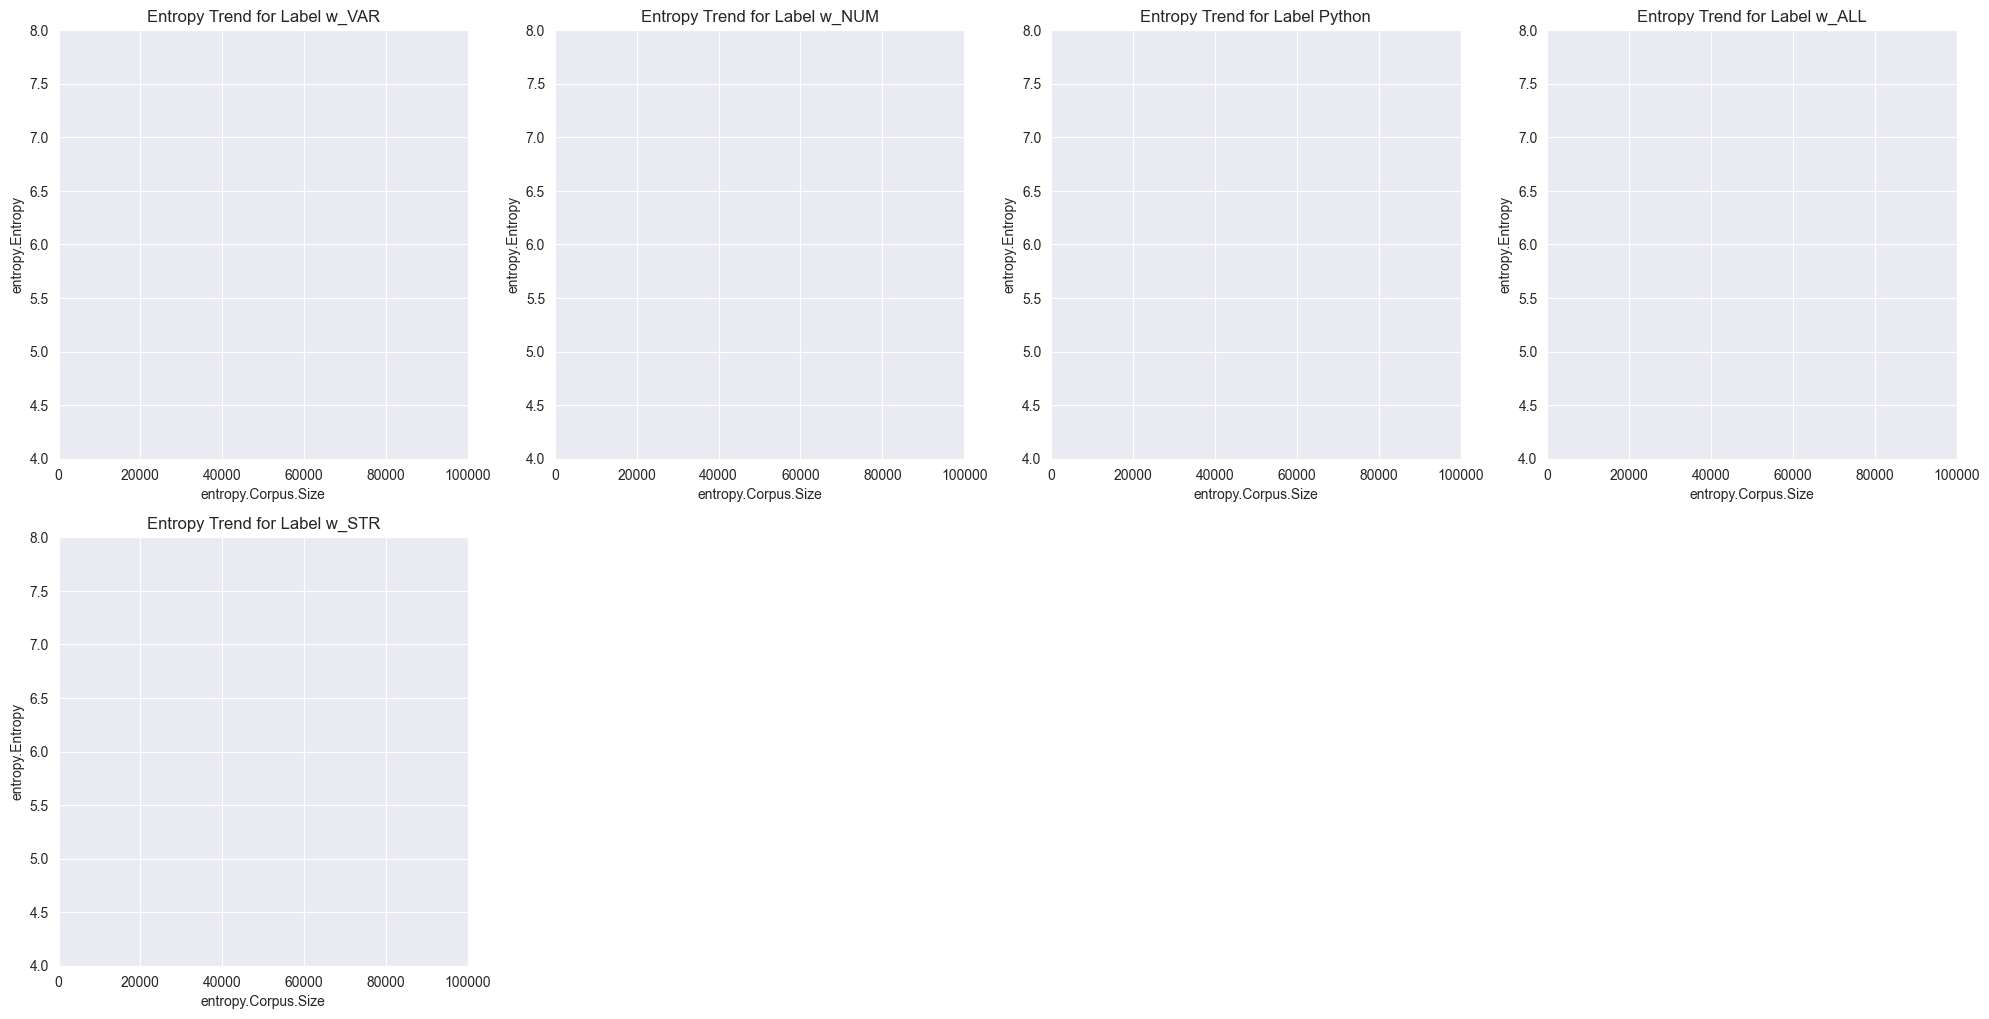

In [66]:
def plot_hrate_by_label_grid(hrate_data):
    labels = hrate_data[label_type].unique()
    n_labels = len(labels)

    # Create 4x4 grid of subplots
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

    # Flatten the 2D array of axes into 1D for easier iteration
    axes = axes.flatten()

    # Create line plot on each subplot
    for ax, label in zip(axes, labels):
        data = hrate_data[hrate_data[label_type] == label]
        sns.lineplot(data=data, x='entropy.Corpus.Size', y='entropy.Entropy', ax=ax, errorbar=None)
        ax.set_title(f'Entropy Trend for Label {label}')
        ax.set_xlim([0, 100000])  # Set x limit
        ax.set_ylim([4, 8])  # Set y limit

    # If there are less than 16 labels, delete unused subplots
    for i in range(n_labels, 16):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


# Call the function with your hrate data
plot_hrate_by_label_grid(hrate)

#### Hrate Time Series

The trend in number (slope) is: -0.0012541822746684652


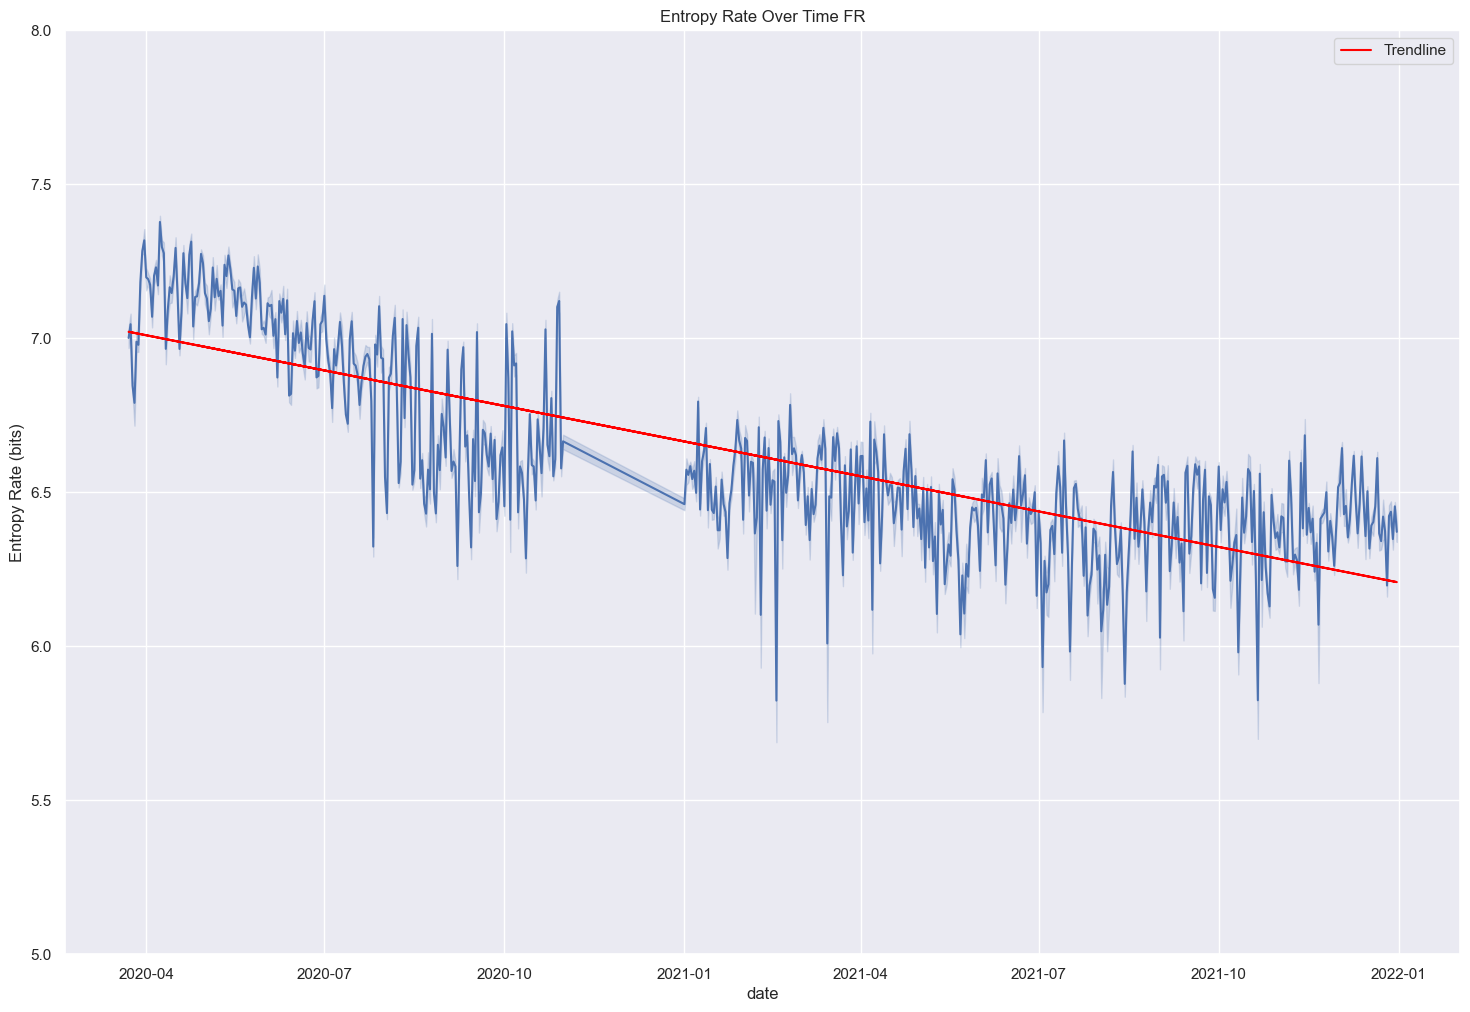

In [34]:
def visualize_hrate_time_series(hrate_data):
    hrate_data['date'] = pd.to_datetime(hrate_data['date'])    
    hrate_data['date_ordinal'] = hrate_data['date'].apply(lambda date: date.toordinal())

    slope, intercept, r_value, p_value, std_err = linregress(hrate_data['date_ordinal'], hrate_data['entropy.Entropy'])    
    print(f"The trend in number (slope) is: {slope}")

    plt.figure(figsize=(18, 12))
    sns.lineplot(data=hrate_data, x='date', y='entropy.Entropy')    
    plt.plot(hrate_data['date'], intercept + slope * hrate_data['date_ordinal'], color='red', label='Trendline')
    
    plt.title('Entropy Rate Over Time FR')
    plt.ylim(5, 8)
    plt.ylabel('Entropy Rate (bits)')
    plt.legend()
    plt.show()

visualize_hrate_time_series(hrate)

### PPM Entropy

#### PPM Entropy by Token Position (All Labels)

In [42]:
# keep value below 500 to avoid outliers
p_entropy = p_entropy[p_entropy['token_pos']<500]

mean: file
Java      2.099182
Python    2.378476
Name: entropy, dtype: float64
std: file
Java      0.416916
Python    0.278133
Name: entropy, dtype: float64
trend (polyfit): file
Java         [0.0012597034210855905, 1.78425579205276]
Python    [0.00026180102711909905, 2.3130254001339203]
dtype: object


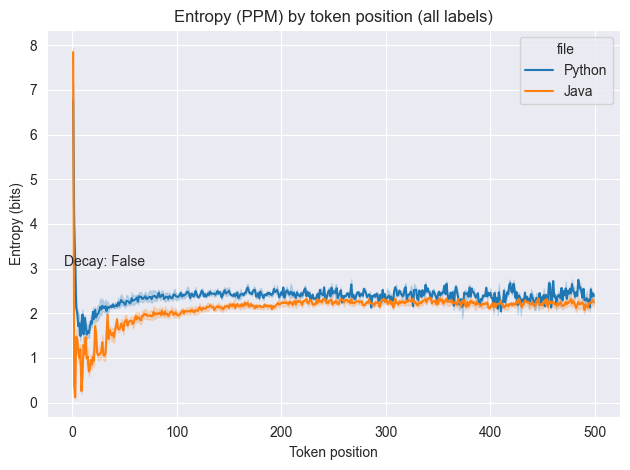

In [43]:
sns.lineplot(data=p_entropy[p_entropy['decay']==False], x='token_pos', y='entropy', hue='file')
plt.title('Entropy (PPM) by token position (all labels)')
plt.ylabel('Entropy (bits)')
plt.xlabel('Token position')
plt.annotate('Decay: False', xy=(0.1, 0.4), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
print(f'mean: {p_entropy[p_entropy["decay"]==False].groupby("file")["entropy"].mean()}')
print(f'std: {p_entropy[p_entropy["decay"]==False].groupby("file")["entropy"].std()}')
def polyfit_with_x(x):
    return np.polyfit(x['token_pos'], x['entropy'], deg=1)
print(f'trend (polyfit): {p_entropy[p_entropy["decay"]==False].groupby("file").apply(polyfit_with_x)}')

mean: file
es_w_P    5.896732
fr_w_P    5.983809
Name: entropy, dtype: float64
std: file
es_w_P    0.204199
fr_w_P    0.112403
Name: entropy, dtype: float64
trend (polyfit): file
es_w_P    [-0.0032823848463699665, 6.005928059322457]
fr_w_P      [-0.003030592636438571, 6.07472687695914]
dtype: object


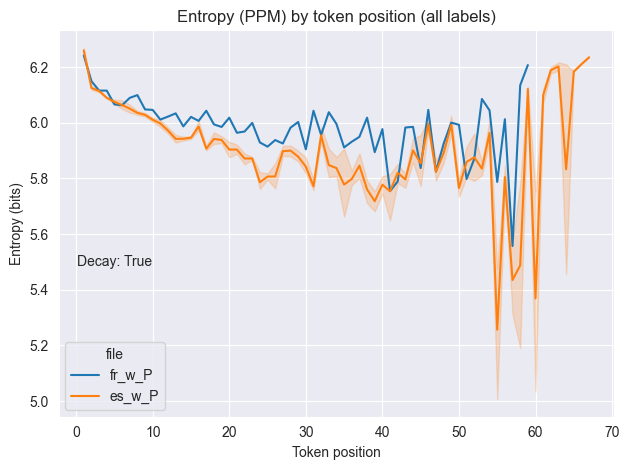

In [138]:
sns.lineplot(data=p_entropy[p_entropy['decay']==True], x='token_pos', y='entropy', hue='file')
plt.title('Entropy (PPM) by token position (all labels)')
plt.ylabel('Entropy (bits)')
plt.xlabel('Token position')
plt.annotate('Decay: True', xy=(0.1, 0.4), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
print(f'mean: {p_entropy[p_entropy["decay"]==True].groupby("file")["entropy"].mean()}')
print(f'std: {p_entropy[p_entropy["decay"]==True].groupby("file")["entropy"].std()}')
def polyfit_with_x(x):
    return np.polyfit(x['token_pos'], x['entropy'], deg=1)
print(f'trend (polyfit): {p_entropy[p_entropy["decay"]==True].groupby("file").apply(polyfit_with_x)}')

#### PPM Entropy by Token Position (Decay)

mean: decay
False    2.870557
True     3.442741
Name: entropy, dtype: float64


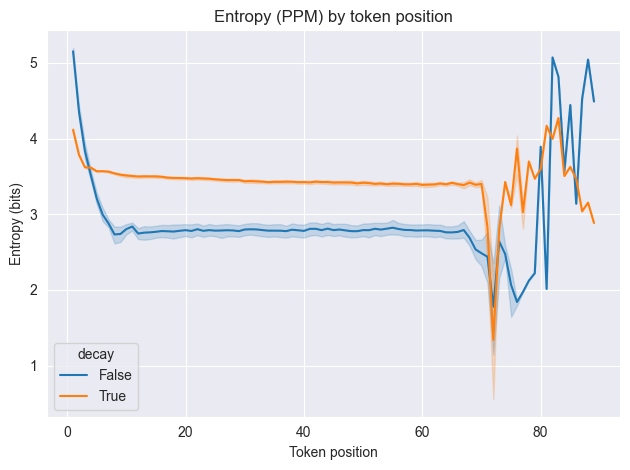

In [82]:
sns.lineplot(data=p_entropy, x='token_pos', y='entropy', hue='decay')
plt.title('Entropy (PPM) by token position')
plt.ylabel('Entropy (bits)')
plt.xlabel('Token position')
plt.tight_layout()
print(f'mean: {p_entropy.groupby("decay")["entropy"].mean()}')  

#### PPM Information Content by Token Position

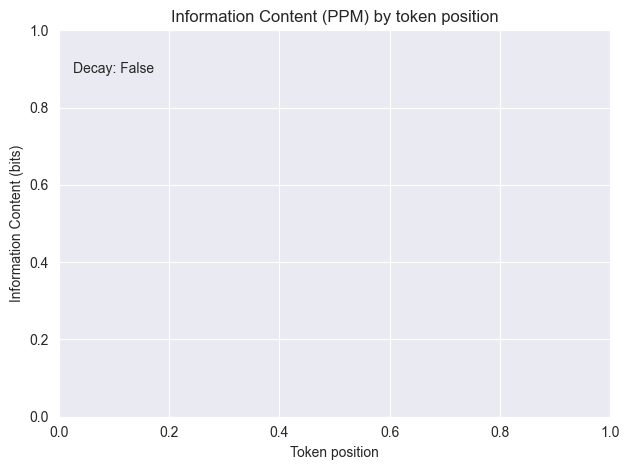

In [140]:
sns.lineplot(data=p_information[p_information['decay']==False], x='token_pos', y='information_content', hue='file')
plt.title('Information Content (PPM) by token position')
plt.ylabel('Information Content (bits)')
plt.xlabel('Token position')
plt.annotate('Decay: False', xy=(0.1, 0.9), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()

mean: file
es_w_P    15.929049
fr_w_P    15.942778
Name: information_content, dtype: float64
std: file
es_w_P    2.931806
fr_w_P    1.755497
Name: information_content, dtype: float64
trend (polyfit): file
es_w_P    [-0.04254734761688022, 17.344479224279375]
fr_w_P      [-0.052590512959710393, 17.520493267014]
dtype: object


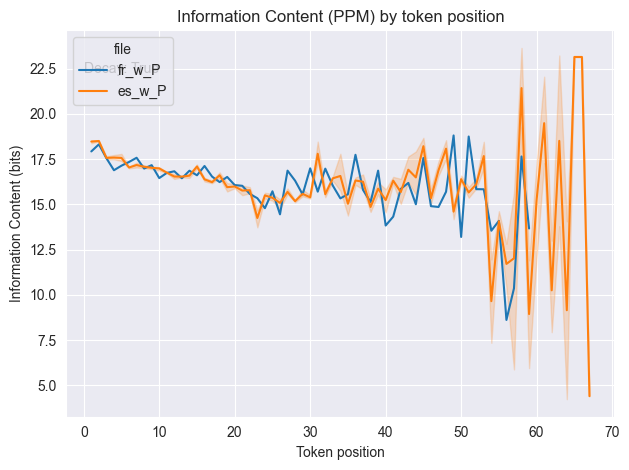

In [145]:
sns.lineplot(data=p_information[p_information['decay']==True], x='token_pos', y='information_content', hue='file')
plt.title('Information Content (PPM) by token position')
plt.ylabel('Information Content (bits)')
plt.xlabel('Token position')
plt.annotate('Decay: True', xy=(0.1, 0.9), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
print(f'mean: {p_information[p_information["decay"]==True].groupby("file")["information_content"].mean()}')
print(f'std: {p_information[p_information["decay"]==True].groupby("file")["information_content"].std()}')
def polyfit_with_x(x):
    return np.polyfit(x['token_pos'], x['information_content'], deg=1)
print(f'trend (polyfit): {p_information[p_information["decay"]==True].groupby("file").apply(polyfit_with_x)}')

#### PPM Model Order

mean: decay
False    5.016769
True     9.250879
Name: model_order, dtype: float64


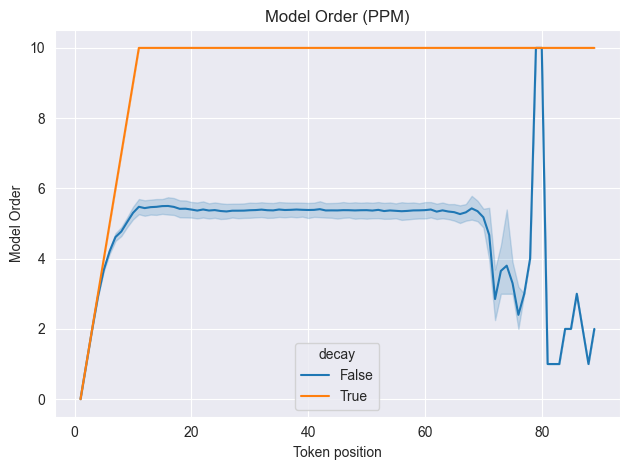

In [87]:
sns.lineplot(data=p_order, x='token_pos', y='model_order', hue='decay')
plt.title('Model Order (PPM)')
plt.ylabel('Model Order')
plt.xlabel('Token position')
plt.tight_layout()
print(f'mean: {p_order.groupby("decay")["model_order"].mean()}')

In [76]:
print(p_order.groupby(['file', 'decay']).agg({'model_order': ['mean', 'std']}))
print(f'trend: {p_order.groupby(["token_pos", "decay"]).agg({"model_order": ["mean", "std"]})}')

                    model_order          
                           mean       std
file          decay                      
alice         False    1.468788  0.502391
              True     7.500000  3.392879
bible         False    1.721618  0.541588
              True     7.405660  3.388798
gatsby        False    1.505891  0.471771
              True     7.868217  3.234047
lesMiserables False    1.429589  0.424051
              True     7.900763  3.213608
romeoJuliette False    1.376387  0.545064
              True     7.659574  3.320038
trend:                 model_order          
                       mean       std
token_pos decay                      
1         False   -0.000378  0.000306
          True     0.000000  0.000000
2         False    0.789119  0.084600
          True     1.000000  0.000000
3         False    1.267322  0.104687
          True     2.000000  0.000000
4         False    1.510447  0.179133
          True     3.000000  0.000000
5         False    1.522913  

#### PPM Distribution of Entropy by Label

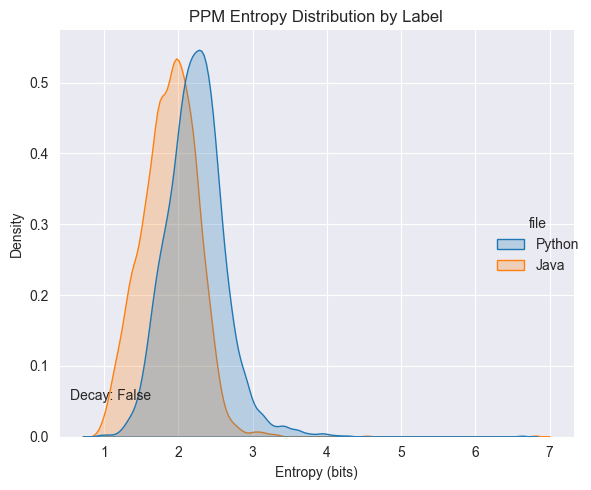

mean: file
Java      1.883062
Python    2.233943
Name: entropy, dtype: float64
std: file
Java      0.383871
Python    0.403781
Name: entropy, dtype: float64


In [44]:
sns.displot(p_distri[p_distri['decay']==False], x='entropy', hue='file', kind='kde', fill=True)
plt.title('PPM Entropy Distribution by Label')
plt.xlabel('Entropy (bits)')
plt.annotate('Decay: False', xy=(0.1, 0.1), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
plt.show()
print(f'mean: {p_distri[p_distri["decay"]==False].groupby("file")["entropy"].mean()}')
print(f'std: {p_distri[p_distri["decay"]==False].groupby("file")["entropy"].std()}')

In [67]:
print(p_distri[p_distri['decay']==False].groupby('file').agg({'entropy': ['mean', 'std']}))

                entropy          
                   mean       std
file                             
alice          7.107909  0.874662
bible          7.061792  1.007760
gatsby         7.942756  1.068289
lesMiserables  7.983934  0.910865
romeoJuliette  7.525198  0.980558


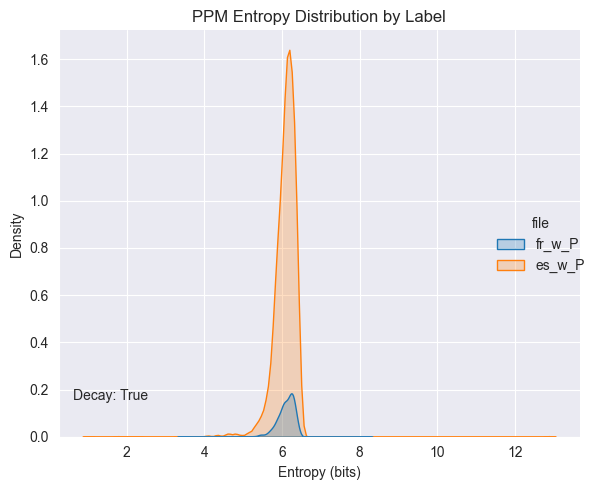

mean: file
es_w_P    6.067616
fr_w_P    6.092559
Name: entropy, dtype: float64
std: file
es_w_P    0.348693
fr_w_P    0.244605
Name: entropy, dtype: float64


In [144]:
sns.displot(p_distri[p_distri['decay']==True], x='entropy', hue='file', kind='kde', fill=True)
plt.title('PPM Entropy Distribution by Label')
plt.xlabel('Entropy (bits)')
plt.annotate('Decay: True', xy=(0.1, 0.1), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
plt.show()
print(f'mean: {p_distri[p_distri["decay"]==True].groupby("file")["entropy"].mean()}')
print(f'std: {p_distri[p_distri["decay"]==True].groupby("file")["entropy"].std()}')

In [66]:
print(p_distri[p_distri['decay']==True].groupby('file').agg({'entropy': ['mean', 'std']}))

                entropy          
                   mean       std
file                             
alice          5.370535  0.272320
bible          5.307532  0.409801
gatsby         5.467840  0.295738
lesMiserables  5.495073  0.297044
romeoJuliette  5.278820  0.383091
